# 1. Objective

To introduce the methods to describe and visualize variation in data

## 1.1 Preliminaries

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt

# 2. Central Tendency & Variation

Let us assume that we are placing a machine learning model that demonstrated 80% accuracy during the development phase into production. We want to track its accuracy before a complete rollout. We test the model for 2 weeks running it on 100 samples randomly drawn from each day's data. The accuracy data is presented below.

In [2]:
#@title Data from a model tested for two weeks on samples of live data
model_accuracy_data = np.random.normal(loc=0.8, scale=0.1, size=14)
model_accuracy_production = pd.Series(model_accuracy_data, 
                                      name='accuracy_in_production',
                                      index=['day_'+ str(i+1) for i in range(14)])

In [3]:
model_accuracy_production

day_1     0.763057
day_2     0.781210
day_3     0.979077
day_4     0.690438
day_5     0.750227
day_6     0.816643
day_7     0.759625
day_8     0.752060
day_9     0.951562
day_10    0.765744
day_11    0.702244
day_12    0.738435
day_13    0.784944
day_14    0.720259
Name: accuracy_in_production, dtype: float64

The number of predictions per day is constant, but there is variation in accuracy due to the randomness associated with the model performance.

In [4]:
model_accuracy_production.min()

0.6904378564633136

In [5]:
model_accuracy_production.max()

0.9790765264567556

## 2.1 Mean and Median

The mean is the average of all the observations in the sample.
The median is the point that divides all observations in the sample into two equal halves, that is, 50% of the data lies below this value.

The mean is sensitive to extraordinarily high or low observations, while the median is relatively robust to such outliers.

 For a sample of observations $X = \{x_1, x_2, \ldots, x_n\}$, the sample mean is 

 $$
\bar{x} = \dfrac{x_1 + x_2 + \ldots + x_n}{n}
 $$


In [6]:
model_accuracy_production.mean()

0.7825374789985704

In [7]:
model_accuracy_production.median()

0.7613409624616461

## 2.2 Quartiles

Quartiles divide the observations in the sample to four equal parts - 25% ($Q_1$), 50% ($Q_2$ = median), 75% ($Q_3$).


In [8]:
model_accuracy_production.quantile(0.25)

0.7413833127275411

In [9]:
model_accuracy_production.quantile(0.75)

0.7840104097878517

## 2.3 Standard Deviation

The standard deviation indicates on an average how far the observations in the sample are from the sample mean. For the sample $X$, the standard deviation $s_X$ is:

$$
s_X = \sqrt{\dfrac{\Sigma_i^n(x_i - \bar{x})^2}{n}}
$$


In [10]:
model_accuracy_production.std()

0.08425231522697807

## 2.4 Descriptive statistics

Put together these different measures give an idea of the variation around the mean in the data.

In [11]:
model_accuracy_production.describe()

count    14.000000
mean      0.782537
std       0.084252
min       0.690438
25%       0.741383
50%       0.761341
75%       0.784010
max       0.979077
Name: accuracy_in_production, dtype: float64

# 3. Plotting variation

## 3.1 Box plot

A good way to visually represent all the measures we discussed in section 2 against the descriptive statistics is a box plot



<img src="https://matplotlib.org/stable/_images/boxplot_explanation.png" width="500" />

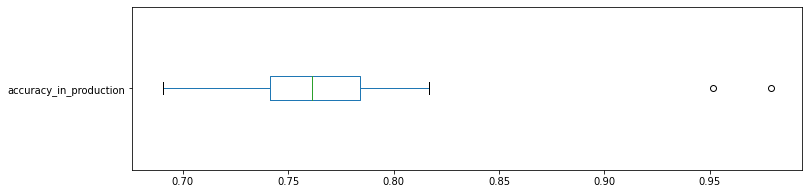

In [12]:
model_accuracy_production.plot.box(vert=False, 
                                   figsize=(12, 3))

## 3.2 Histogram

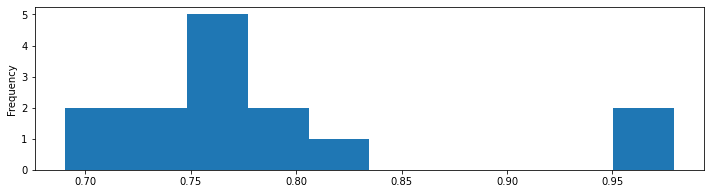

In [13]:
model_accuracy_production.plot.hist(figsize=(12, 3))

# 4. Case Study - Project Hulk

Hotstar's dev team organize 'game day' simulations to test the load on their streaming service. During these periods the pattern of match watching viewers is replicated and the infrastructure is put to the test. They refer to this as [Project Hulk](https://www.slideshare.net/AWSUsersGroupBengalu/scaling-hotstarcom-for-10-million-concurrent-viewers). 

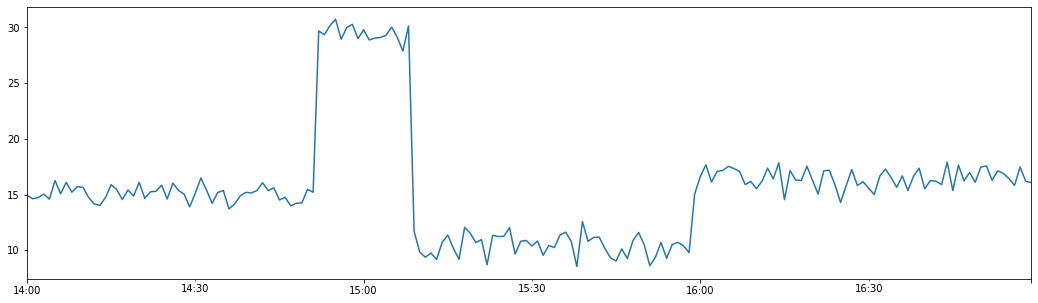

In [17]:
#@title Data with concurrent users streaming an IPL match
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

time_index= pd.date_range(start='2021-10-11 14:00:00',
                          periods=180,
                          freq='T')

X, y_true = make_blobs(n_samples=(50, 50, 20, 60), 
                       n_features=1,
                       centers=None,
                       center_box=[3, 30],
                       cluster_std=1.0, 
                       random_state=20130810)

learner_gmm = GaussianMixture(n_components=4).fit(X)

concurrent_users_per_minute = pd.Series(learner_gmm.sample(time_index.size)[0].flatten(),
                                        index=time_index,
                                        name='concurrent_users_per_minute')

concurrent_users_per_minute.plot(figsize=(18, 5))

Planning for the 'game day' simulation will need us to establish the stress points pattern accounting for the stretch that might happen during peak times.

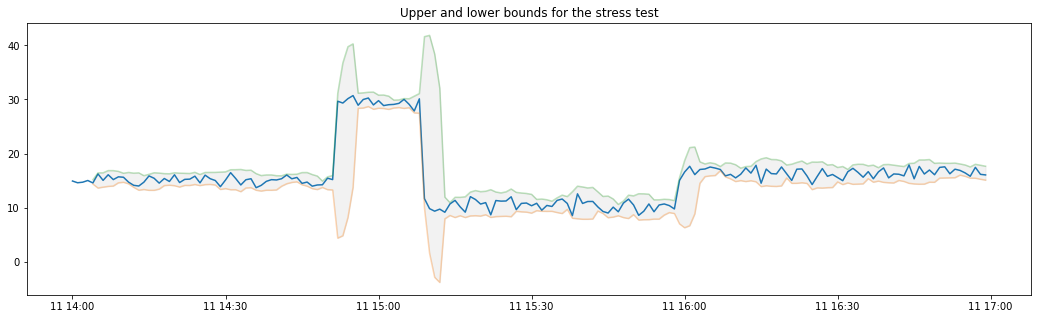

In [18]:
#@title Create Bollinger Bounds using the mean and standard deviation
# Assuming roughly 5 minutes per over
concurrent_users_per_minute_ma_5 = (concurrent_users_per_minute.rolling(window=5)
                                                               .mean())

concurrent_users_per_minute_sd_5 = (concurrent_users_per_minute.rolling(window=5)
                                                               .std())

concurrent_users_per_minute_lb = concurrent_users_per_minute_ma_5 - 2 * concurrent_users_per_minute_sd_5
concurrent_users_per_minute_ub = concurrent_users_per_minute_ma_5 + 2 * concurrent_users_per_minute_sd_5

plt.figure(figsize=(18, 5))

plt.plot(time_index, concurrent_users_per_minute)
plt.plot(time_index,
         concurrent_users_per_minute_lb,
         alpha=0.3)
plt.plot(time_index,
         concurrent_users_per_minute_ub,
         alpha=0.3)
plt.fill_between(time_index, 
                 concurrent_users_per_minute_ub, 
                 concurrent_users_per_minute_lb, 
                 color='grey', alpha=0.1)

plt.title('Upper and lower bounds for the stress test');

# Summary

1. The mean estimates the center of a numeric variable, while the standard deviation estimates the dispersion of individual values around the center

2. The mean and standard devition are heavily influenced by outliers, so in such cases, the median & IQR might be better estimates of the center and the variation